# RGPS Survey Design

The purpose of this notebook is to explore the nominal survey design for the Roman Galactic Plane Survey

In [1]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
from astropy.table import Table, Column, vstack
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import config_utils
import regions
import plot_metric_results
import visualization_utils
import numpy as np
from astropy import units as u 
from mw_plot import MWSkyMap
import healpy as hp

## Setup

In [2]:
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

In [4]:
all_survey_regions = regions.load_regions_from_file(sim_config, path.join(sim_config['root_dir'], 'region_data', 'rgps_survey_regions.json'))

In [5]:
plot_colors = ['#5f038c', '#3303ab', '#0344a6', '#04b8ac', '#058c01', '#ab6902', '#7a0701', '#7d039c', '#080f17', '#333033']

## Plot sky regions in survey

/var/folders/1d/5hlyfsgd0kl_nd815xmp9cv00000gn/T/ipykernel_6985/398050033.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

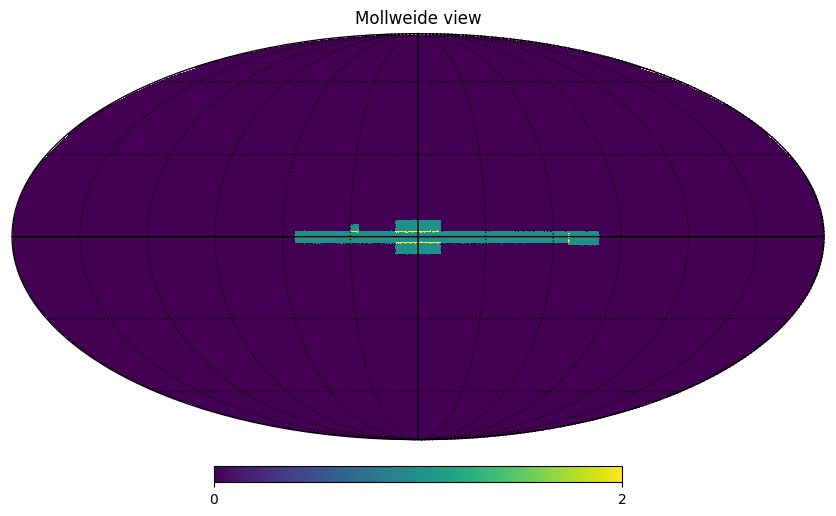

In [8]:
# Wide Area Survey, using F213 footprint to represent the widest area covered
survey_name = 'wide_area'
survey_definition = all_survey_regions[survey_name]

region_set = [r for r in survey_definition['F213']]
r_merge = regions.combine_regions(region_set)

fig = plt.figure(1,(10,10))
hp.mollview(r_merge.region_map)
hp.graticule()
plt.tight_layout()

In [ ]:
survey_name = 'wide_area'
survey_definition = all_survey_regions[survey_name]

mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='infrared', figsize=(16, 10))

region_set = []
k = -1
for optic in sim_config['OPTICAL_COMPONENTS']:
    for r in survey_definition[optic]:
        if 'Bulge' in r.name and 'epoch1' in r.name and r.name not in region_set:
            region_set.append(r.name)
            k += 1
            s = r.pixels_to_skycoords()
            mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, c=plot_colors[k], s=5, alpha=0.2)

        if 'Bulge' in r.name and 'epoch2' in r.name and r.name not in region_set:
            k += 1
            s = r.pixels_to_skycoords()
            mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, c='black', s=5, alpha=0.1)
